In [1]:
import copy
import importlib
import os
import pathlib
from typing import Any, Mapping, Sequence

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import ray
import scipy
import seaborn as sns
import tensorflow as tf
from daaf import estimator_metrics
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

2024-03-22 00:24:58.519776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 00:24:58.592444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 00:24:58.593457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 00:25:00.385610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from utils import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/controljob/agg/1710783127/1710948969/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/37 [00:00<?, ?it/s]

2024-03-22 00:25:05,461	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8269 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

(_execute_read_task_split pid=3375952) /home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
(_execute_read_task_split pid=3375952)   return transform_pyarrow.concat(tables)


Read progress 0:   0%|          | 0/187 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [6]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[0.6902523503216229, 0.6843146956952004, 0.658...","{'returns': {'mean': 0.6277585353785256, 'std'...",PP/IMR
1,2020,1710783127-0c4abb49-ABCSeq,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-8.932211776348343, -9.029688273132113, -8.91...","{'returns': {'mean': -8.972043542800595, 'std'...",PP/LEAST
2,2020,1710783127-0c7d7266-ABCSeq,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-9.040573973280555, -8.904997525977238, -8.89...","{'returns': {'mean': -8.994136566056408, 'std'...",PP/FR
3,2020,1710783127-0c62fb10-ABCSeq,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[-99.1578426521524, -100.2350321622959, -100.4...","{'returns': {'mean': -99.71100940128647, 'std'...",OP/OT
4,2020,1710783127-0bf121a4-ABCSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-36.08362196932212, -36.01830776843147, -36.0...","{'returns': {'mean': -36.07530925284512, 'std'...",OP/OT
...,...,...,...,...,...,...
275995,1080,1710783127-fbd9f298-ABCSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-16.896392229417206, -16.861239592969472, -16...","{'returns': {'mean': -16.885522664199815, 'std...",PP/FR
275996,1080,1710783127-e87e1792-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-14.755781683626273, -15.43663274745606, -15....","{'returns': {'mean': -15.024606845513414, 'std...",PP/FR
275997,1080,1710783127-e839088b-TowerOfHanoi,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-37.371877890841816, -35.00185013876041, -35....","{'returns': {'mean': -36.1022664199815, 'std':...",PP/LEAST
275998,1080,1710783127-e8534ab1-TowerOfHanoi,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-34.41258094357077, -35.640148011100834, -37....","{'returns': {'mean': -35.970629047178534, 'std...",PP/LEAST


In [7]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'sarsa',
 'algorithm_args': '{}',
 'discount_factor': 0.99,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([0.0123561 , 0.01042443, 0.01933841, 0.00947773, 0.01478703,
        0.        , 0.03889444, 0.        , 0.03260246, 0.08433763,
        0.13781085, 0.        , 0.        , 0.17034482, 0.43357944,
        0.        ]),
 'env': {'args': '{"is_slippery": false, "map_name": "4x4"}',
  'level': '4x4',
  'name': 'FrozenLake-v1',
  '_level': 'U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I='},
 'epsilon': 0.2,
 'exp_id': '1710783127-0c58e762-FrozenLake-v1',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 2,
 'run_id': 10,
 'traj_mapping_method': 'IMR'}

In [8]:
df_wide_metrics = dataproc.wide_metrics(df_metrics)

In [9]:
df_wide_metrics

,episode,exp_id,meta,returns,method
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",0.690252,PP/IMR
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",0.684315,PP/IMR
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",0.658585,PP/IMR
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",0.586343,PP/IMR
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",0.634339,PP/IMR
...,...,...,...,...,...
275999,1080,1710783127-e82027b6-IceWorld,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",-22.412581,PP/LEAST
275999,1080,1710783127-e82027b6-IceWorld,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",-27.291397,PP/LEAST
275999,1080,1710783127-e82027b6-IceWorld,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",-29.117484,PP/LEAST
275999,1080,1710783127-e82027b6-IceWorld,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...",-24.483811,PP/LEAST


In [10]:
len(df_wide_metrics["episode"].unique())

250

In [11]:
envs = dataproc.get_distinct_envs(df_wide_metrics)

In [12]:
envs

{('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}'}

In [13]:
def create_returns_plotting_data(
    df_data: pd.DataFrame,
):
    methods = sorted(df_data["method"].unique())
    methods_palette = {
        method: color for method, color,  in zip(methods, sns.color_palette())
    }
    df_result = copy.deepcopy(df_data)
    for key in ("algorithm", "algorithm_args", "reward_period", "discount_factor"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])    
    for key in ("level", "name"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["env"][key])
        
    del df_result["meta"]
    
    df_baseline = df_result[df_result["reward_period"] == 1]
    df_result = df_result[df_result["reward_period"] != 1]
    baseline_dfs = []
    distinct_algo_configs = df_result[["algorithm", "algorithm_args", "reward_period"]].drop_duplicates()
    for row in distinct_algo_configs.to_dict("records"):
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        mask = (
            (df_baseline_rp["algorithm"] == row["algorithm"]) & 
            (df_baseline_rp["algorithm_args"] == row["algorithm_args"])
        )
        df_baseline_rp = df_baseline_rp[mask]
        df_baseline_rp["reward_period"] = row["reward_period"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "algorithm", "reward_period", "algorithm_args"])
    
    # agg returns
    df_result["mean_returns"] = df_result["returns"].apply(lambda returns: np.mean(returns))
    dfs = {}
    algo_types = {
        "one-step": set(["sarsa", "q-learning"]),
        "n-step": set(["nstep-sarsa"]),
    }
    for algo_type, algorithms in algo_types.items():
        df_algo = df_result[df_result["algorithm"].apply(lambda met: met in algorithms)]
        dfs[algo_type] = df_algo
    
    return dfs

In [14]:
df_returns_curves = create_returns_plotting_data(df_metrics)

(raylet) [2024-03-22 00:26:05,456 E 3375898 3375898] (raylet) node_manager.cc:3024: 4 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 87f73d99436f8c4475ebc8fd41262aedd899d0c4f6dc65b167b8cd3f, IP: 10.173.12.229) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 10.173.12.229`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [15]:
df_returns_curves["one-step"]

,episode,exp_id,returns,metrics,method,algorithm,algorithm_args,reward_period,discount_factor,level,name,mean_returns
4,2020,1710783127-0bf121a4-ABCSeq,"[-36.08362196932212, -36.01830776843147, -36.0...","{'returns': {'mean': -36.07530925284512, 'std'...",OP/OT,q-learning,{},2,1.00,n=10,ABCSeq,-36.075309
41,2020,1710783127-1e37fc33-TowerOfHanoi,"[-130.79317169717962, -130.91885205343888, -13...","{'returns': {'mean': -130.87382483918853, 'std...",OP/OT,q-learning,{},2,1.00,disks=4,TowerOfHanoi,-130.873825
181,2020,1710783127-1f5332a6-IceWorld,"[-34.646214745175655, -34.703117268678874, -34...","{'returns': {'mean': -34.71190004948046, 'std'...",OP/OT,q-learning,{},2,0.99,4x4,IceWorld,-34.711900
261,2020,1710783127-1fd1497b-FrozenLake-v1,"[0.7535873330034636, 0.6907471548738249, 0.725...","{'returns': {'mean': 0.7010390895596241, 'std'...",OP/OT,q-learning,{},2,1.00,4x4,FrozenLake-v1,0.701039
344,2020,1710783127-3362ab56-GridWorld,"[-129.57149925779316, -136.51608114794655, -12...","{'returns': {'mean': -129.68631865413164, 'std...",OP/OT,q-learning,{},2,0.99,4x12,GridWorld,-129.686319
...,...,...,...,...,...,...,...,...,...,...,...,...
275541,1080,1710783127-b95906b7-FrozenLake-v1,"[0.3820536540240518, 0.32469935245143383, 0.01...","{'returns': {'mean': 0.132099907493062, 'std':...",PP/LEAST,sarsa,{},16,1.00,4x4,FrozenLake-v1,0.132100
275583,1080,1710783127-8fa468f8-RedGreenSeq,"[-10.267345050878816, -9.977798334875116, -10....","{'returns': {'mean': -10.23718778908418, 'std'...",PP/LEAST,sarsa,{},16,1.00,n=9,RedGreenSeq,-10.237188
275753,1080,1710783127-9be9a16e-FrozenLake-v1,"[0.008325624421831638, 0.09805735430157261, 0....","{'returns': {'mean': 0.08876040703052729, 'std...",PP/LEAST,sarsa,{},16,0.99,4x4,FrozenLake-v1,0.088760
275921,1080,1710783127-dcbd4570-TowerOfHanoi,"[-79.16651248843664, -78.14893617021276, -71.7...","{'returns': {'mean': -81.41258094357076, 'std'...",PP/LEAST,sarsa,{},16,1.00,disks=4,TowerOfHanoi,-81.412581


In [16]:
df_returns_curves["n-step"]

,episode,exp_id,returns,metrics,method,algorithm,algorithm_args,reward_period,discount_factor,level,name,mean_returns
54,2020,1710783127-17a18dd8-FrozenLake-v1,"[0.7511133102424542, 0.7273626917367639, 0.674...","{'returns': {'mean': 0.7068530430479961, 'std'...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,4x4,FrozenLake-v1,0.706853
123,2020,1710783127-07619007-GridWorld,"[-37.414646214745176, -37.771895101434936, -34...","{'returns': {'mean': -35.79544779811974, 'std'...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,1.00,4x12,GridWorld,-35.795448
191,2020,1710783127-65d27caf-GridWorld,"[-35.905987135081645, -36.3419099455715, -34.6...","{'returns': {'mean': -35.657718951014346, 'std...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,0.99,4x12,GridWorld,-35.657719
194,2020,1710783127-755a19ac-ABCSeq,"[-13.829787234042554, -13.819396338446314, -13...","{'returns': {'mean': -13.804477981197428, 'std...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,0.99,n=10,ABCSeq,-13.804478
226,2020,1710783127-4b669bee-ABCSeq,"[-8.933201385452746, -8.943097476496783, -9.02...","{'returns': {'mean': -8.979960415635823, 'std'...",PP/FR,nstep-sarsa,"{""nstep"": 2}",2,0.99,n=7,ABCSeq,-8.979960
...,...,...,...,...,...,...,...,...,...,...,...,...
275565,1080,1710783127-8f117285-GridWorld,"[-105.63922294172063, -79.13506012950971, -98....","{'returns': {'mean': -95.38506012950971, 'std'...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,4x12,GridWorld,-95.385060
275631,1080,1710783127-af6a2aea-RedGreenSeq,"[-10.08418131359852, -10.03977798334875, -10.2...","{'returns': {'mean': -10.062580943570767, 'std...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,n=9,RedGreenSeq,-10.062581
275847,1080,1710783127-c8150715-IceWorld,"[-34.10360777058279, -35.16928769657724, -34.3...","{'returns': {'mean': -34.92844588344126, 'std'...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,1.00,4x4,IceWorld,-34.928446
275853,1080,1710783127-c9066e09-ABCSeq,"[-10.393154486586495, -10.050878815911194, -10...","{'returns': {'mean': -10.220212765957447, 'std...",PP/nTD-SU,nstep-sarsa,"{""nstep"": 8}",8,0.99,n=7,ABCSeq,-10.220213


## Average Returns Plots

We plot the average return for each method after every episode. This is average is from the return of every episode up until that point

In [17]:
sorted((df_returns_curves["one-step"]["name"] + "/" + df_returns_curves["one-step"]["level"]).unique())

['ABCSeq/n=10',
 'ABCSeq/n=7',
 'FrozenLake-v1/4x4',
 'GridWorld/4x12',
 'IceWorld/4x4',
 'IceWorld/8x8',
 'RedGreenSeq/n=9',
 'TowerOfHanoi/disks=4']

In [18]:
sorted((df_returns_curves["n-step"]["name"] + "/" + df_returns_curves["n-step"]["level"]).unique())

['ABCSeq/n=10',
 'ABCSeq/n=7',
 'FrozenLake-v1/4x4',
 'GridWorld/4x12',
 'IceWorld/4x4',
 'IceWorld/8x8',
 'RedGreenSeq/n=9',
 'TowerOfHanoi/disks=4']

In [19]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)



In [20]:
MARKERS = ["s", "p", "o", "P", "X", "d"]

In [21]:
DASHES = {
    "PP/FR": (1, 0),
    "PP/IMR": (1, 1),
    "PP/LEAST": (2, 1),
    "PP/nTD-SU": (3, 1),
    "OP/OT": (4, 2)
}

In [22]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["PP/FR", "PP/IMR", "PP/LEAST", "PP/nTD-SU", "OP/OT"],
        sns.color_palette()
    )
}    

In [23]:
SHORT_NAMES = {
    "TowerOfHanoi": "ToH",
    "RedGreenSeq": "RGS"
}

In [24]:
def plot_eval_result(
    env: str,
    level: str,
    discount_factor: float,
    df_data: pd.DataFrame,
    suffix: str,    
    max_episode: int = np.inf,
    max_reward_period: int = 8,
    output_dir: str = "figures/returnplots"
):
    df_data = df_data[suffix]
    methods = sorted(df_data["method"].unique())
    filter_mask = (
        (df_data["name"] == env) &
        (df_data["level"] == level) &
        (df_data["discount_factor"] == discount_factor) & 
        (df_data["episode"] <= max_episode) &
        (df_data["reward_period"] <= max_reward_period)        
    )
    df_result = copy.deepcopy(df_data[filter_mask])
    def rename_env(env: str):
        try:
            return SHORT_NAMES[env]
        except KeyError:
            return env
                               
    df_result["name"] = df_result["name"].apply(rename_env)
    df_result = df_result.rename(
        {
            "reward_period": "P", 
            "episode": "Episode", 
            "algorithm": "A", 
            "mean_returns": "Avg Returns",
            "method": "Method"
        }, 
        axis=1
    )
    # split to give flexibility in plotting
    algorithms = sorted(df_result["A"].unique())
    for algorithm in algorithms:
        name_prefix = "_".join(
            [str(token) for token in ["rc", algorithm, env, level, discount_factor]]
        )
        df_plot = df_result[df_result["A"] == algorithm]
        facet_grid = sns.relplot(
            data=df_plot, x="Episode", y="Avg Returns",
            col="P", row="A",
            hue="Method",
            style="Method",
            kind="line",
            palette=METHODS_PALETTES,
            errorbar="sd",
            height=2,
            dashes=DASHES
        )
        title_template = ", ".join([f"{rename_env(env)}({level})", "P = {col_name}"])
        facet_grid.set_titles(title_template)
        export_figure(facet_grid.figure, os.path.join(output_dir, f"{name_prefix}_{suffix}"))
        plt.show()    

### ABCSeq n=7, $\gamma = 1$

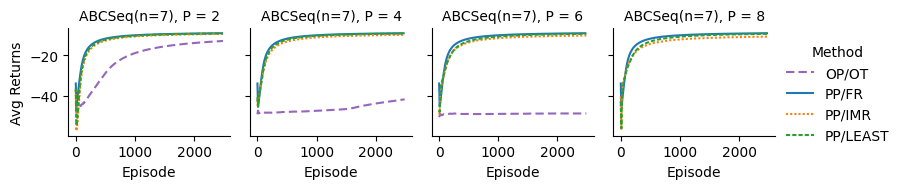

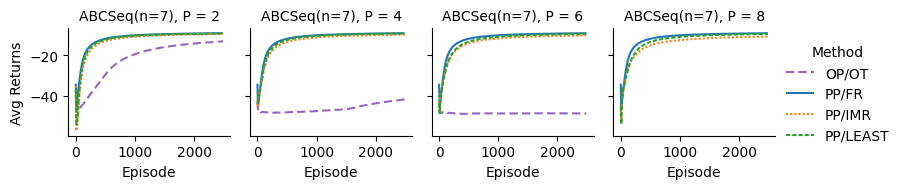

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="one-step"
)


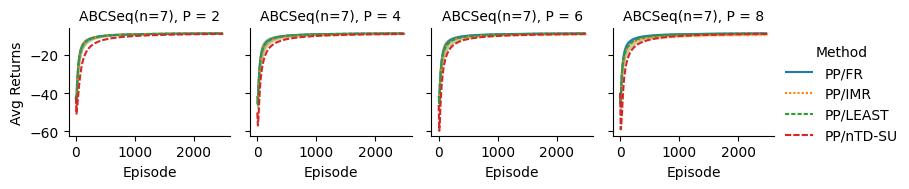

In [26]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq, n=7, $\gamma = 0.99$

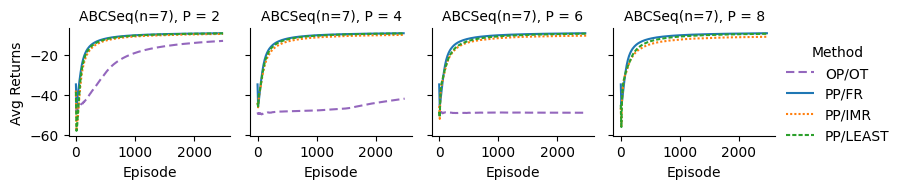

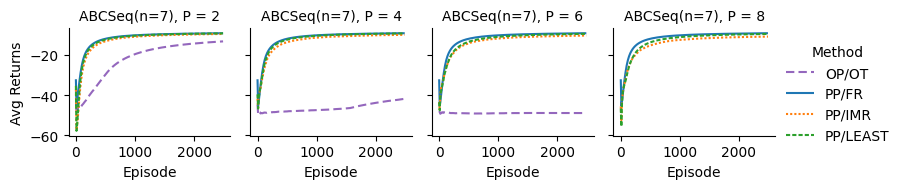

In [27]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


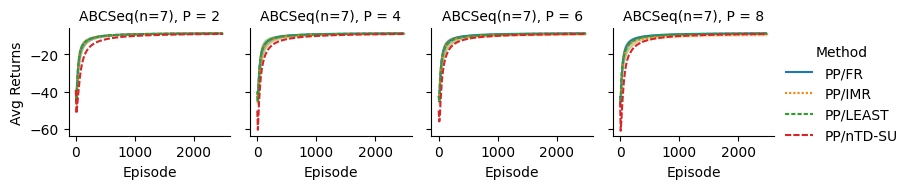

In [28]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq n=10, $\gamma = 1.0$

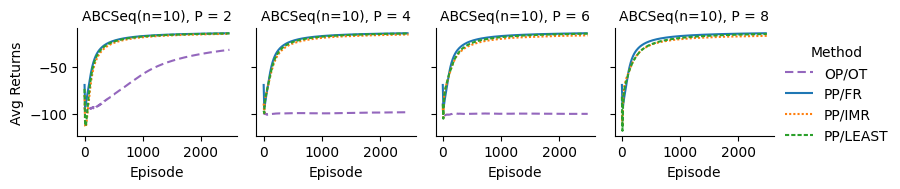

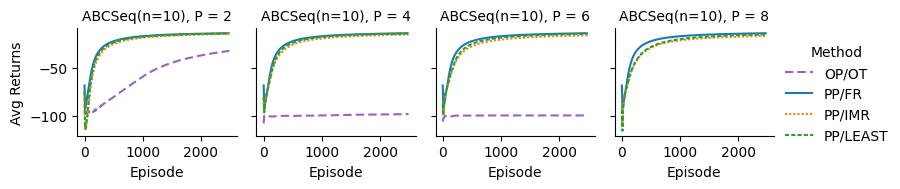

In [29]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="one-step"
)


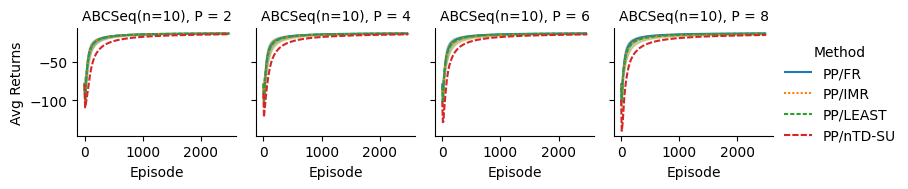

In [30]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    df_data=df_returns_curves,
    suffix="n-step"
)


### ABCSeq n=10, $\gamma = 0.99$

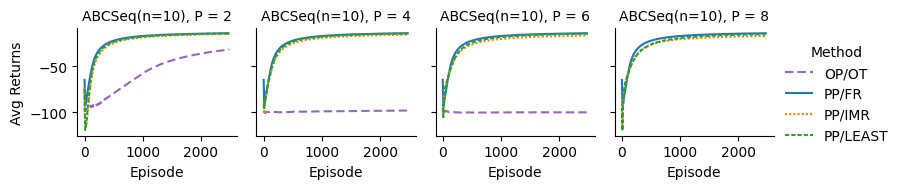

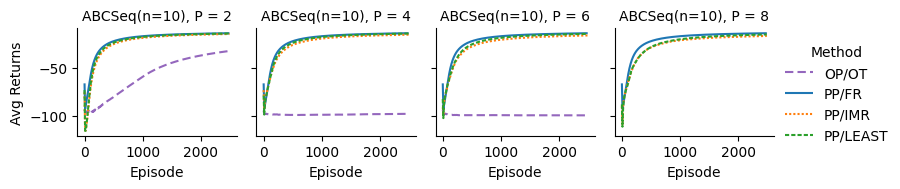

In [31]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


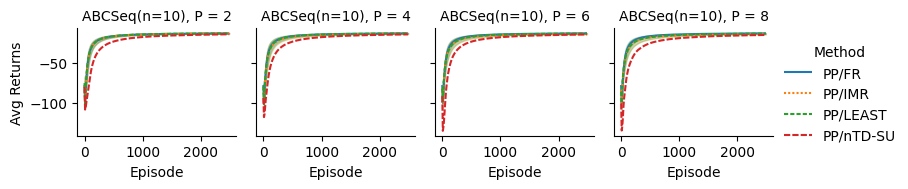

In [32]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### GridWorld, 4x12, $\gamma = 1$

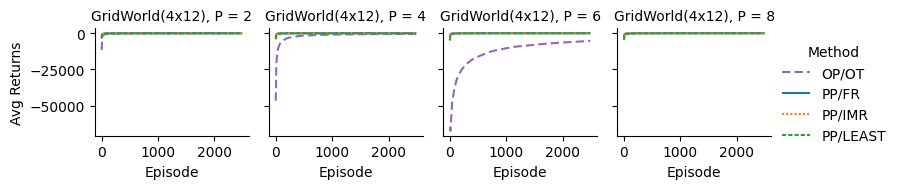

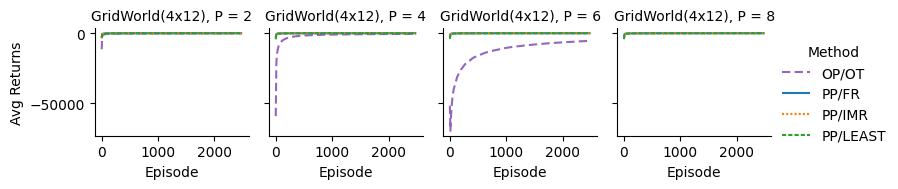

In [33]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


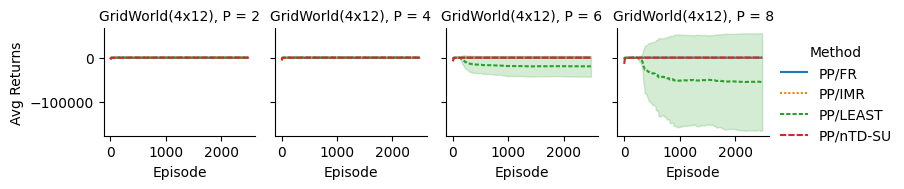

In [34]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### GridWorld, 4x12, $\gamma = 0.99$

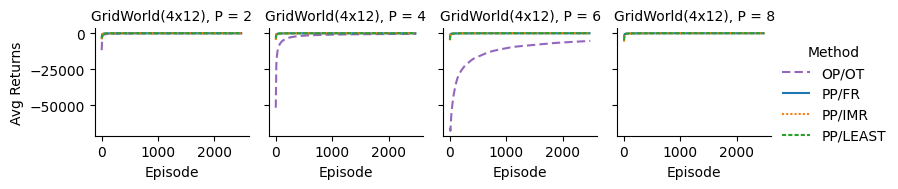

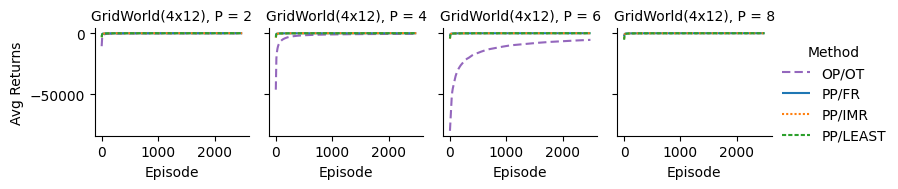

In [35]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


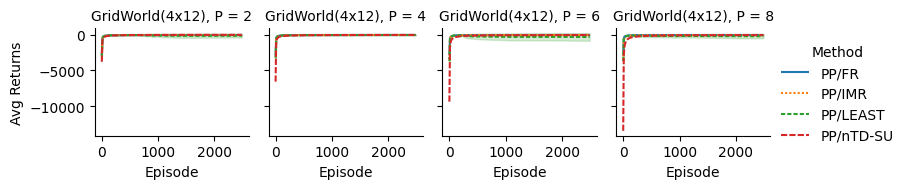

In [36]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/4x4, $\gamma=1$

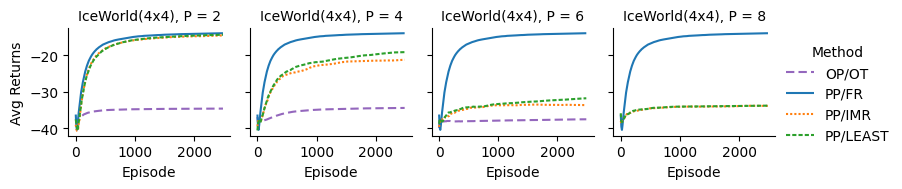

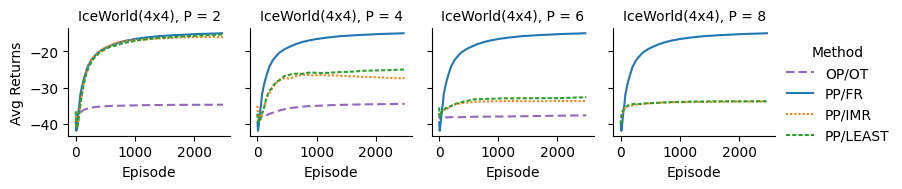

In [37]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


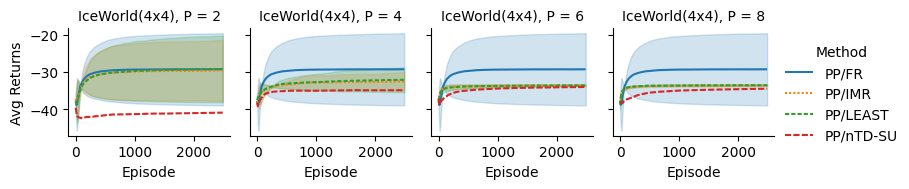

In [38]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/4x4, $\gamma=0.99$

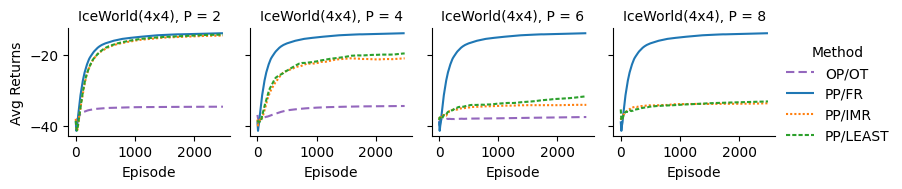

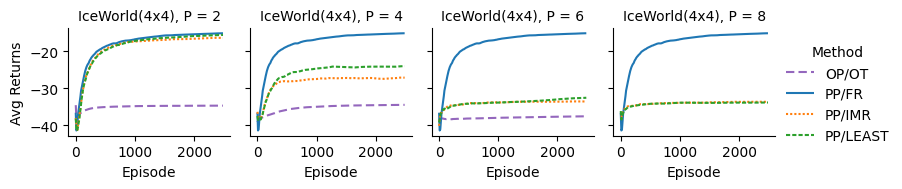

In [39]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


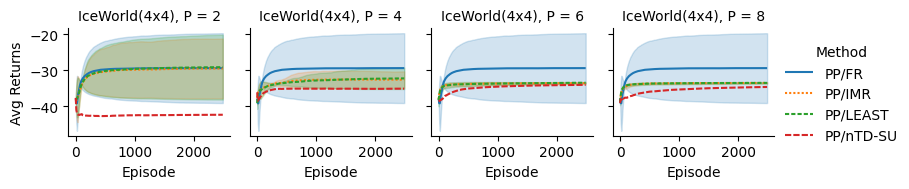

In [40]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/8x8, $\gamma=1$

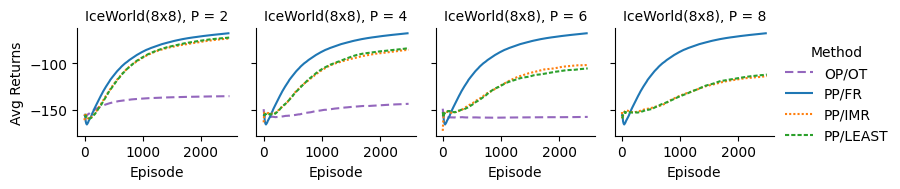

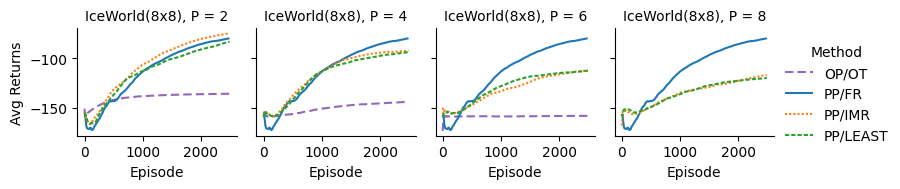

In [41]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


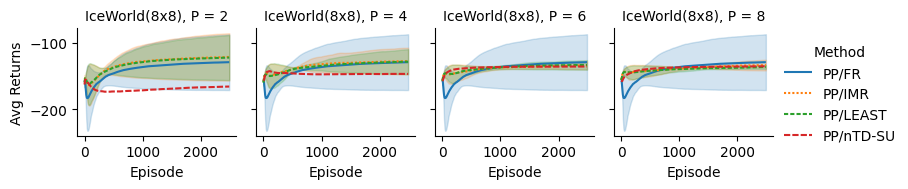

In [42]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### IceWorld/8x8, $\gamma=0.99$

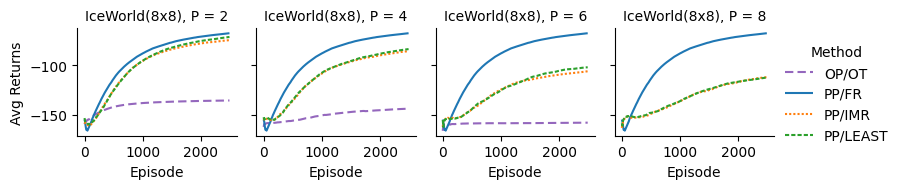

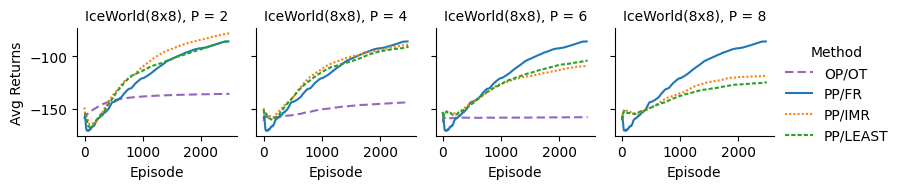

In [43]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


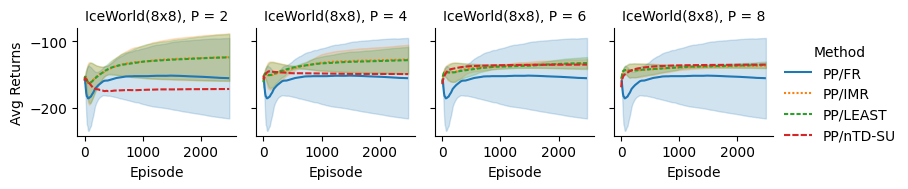

In [44]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### RedGreenSeq/n=9, $\gamma = 1$

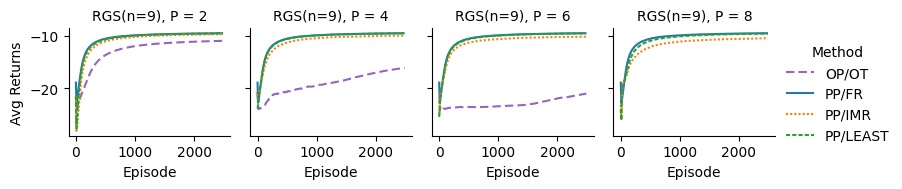

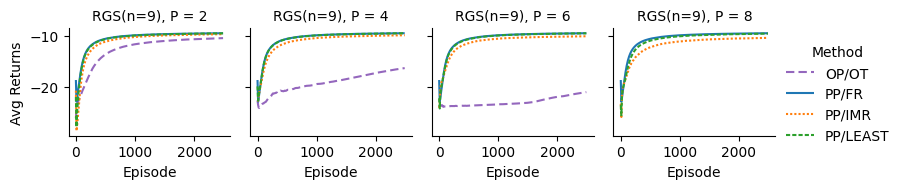

In [45]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


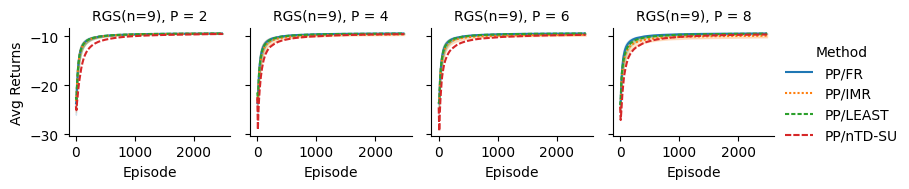

In [46]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### RedGreenSeq/n=9, $\gamma = 0.99$

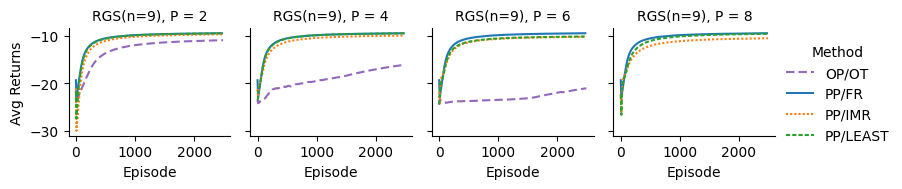

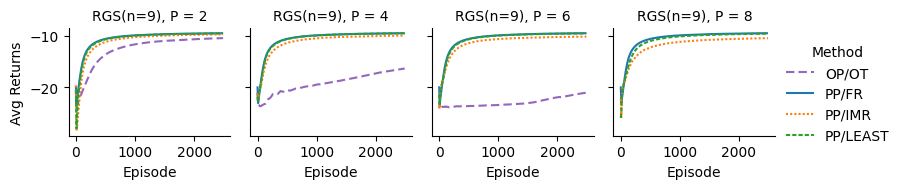

In [47]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


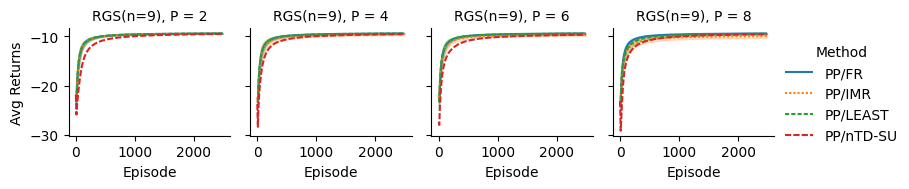

In [48]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


### TowerOfHanoi/disks=4, $\gamma = 1$

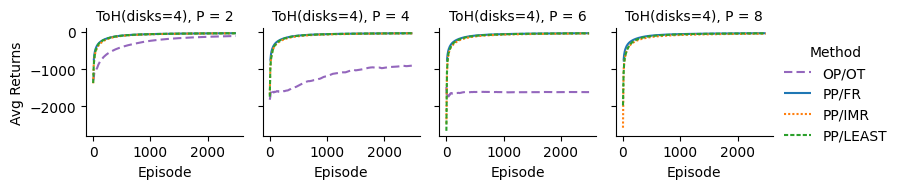

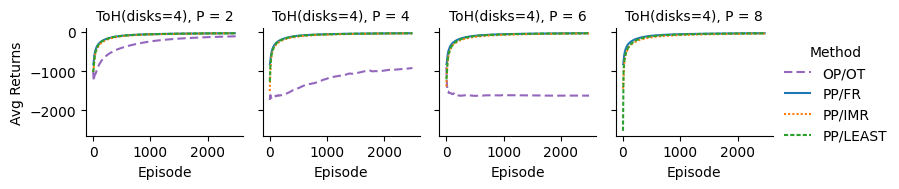

In [49]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


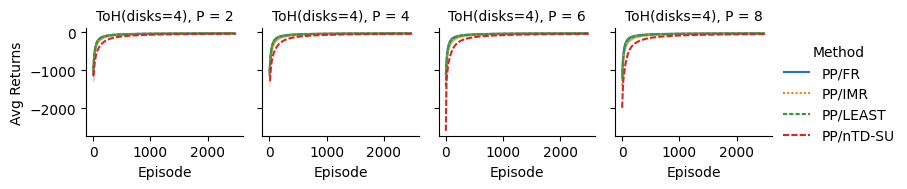

In [50]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### TowerOfHanoi/disks=4, $\gamma = 0.99$

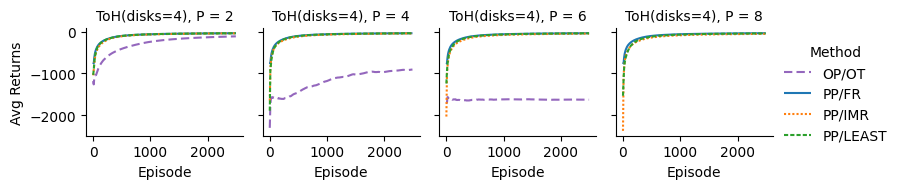

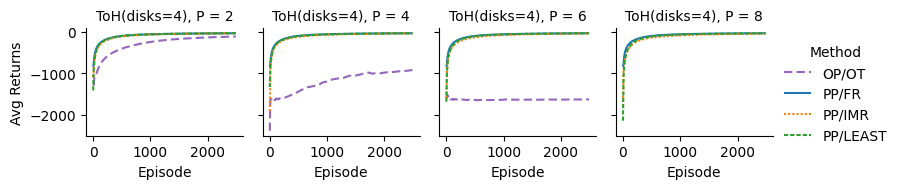

In [51]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


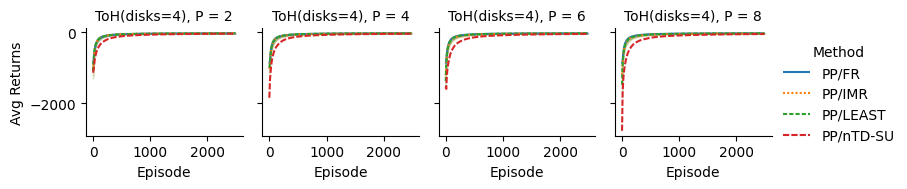

In [52]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)


## Other Envs (Sparse Rewards)

### FrozenLake-v1/4x4, $\gamma = 1$

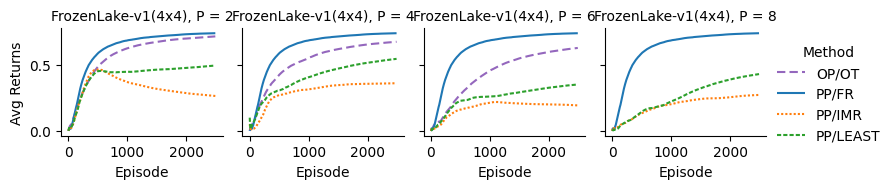

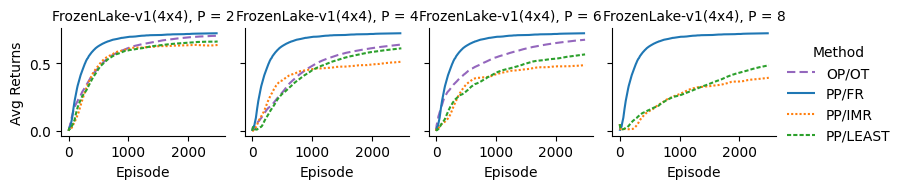

In [53]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="one-step"
)


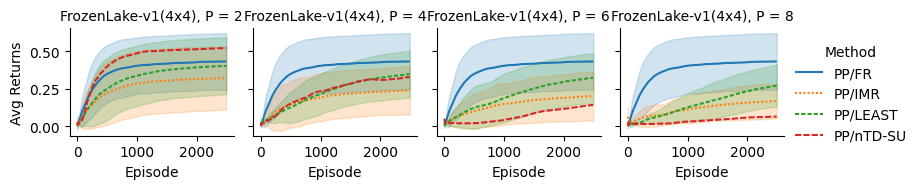

In [54]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1,
    df_data=df_returns_curves,
    suffix="n-step"
)


### FrozenLake-v1/4x4, $\gamma = 0.99$

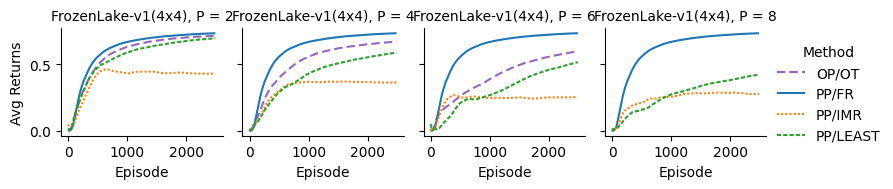

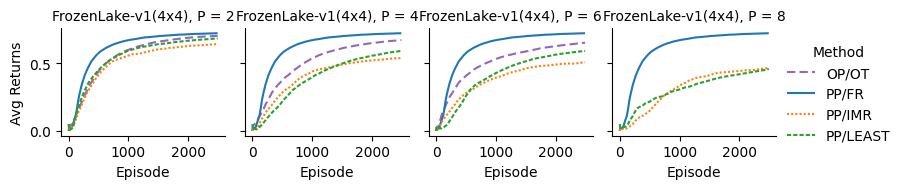

In [55]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="one-step"
)


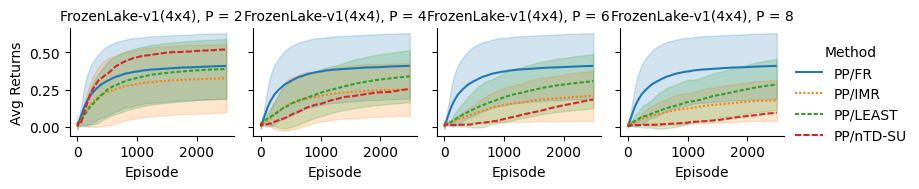

In [56]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    df_data=df_returns_curves,
    suffix="n-step"
)
